![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [65]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")

# Get the first 5 rows
penguins_df.head()

# Get a concise summary of the DataFrame
print(penguins_df.info())

# Display basic statistics for each numeric column
print(penguins_df.describe())

# Check for any missing values
print(penguins_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        332.000000       332.000000         332.000000   332.000000
mean          44.021084        17.153012         200.975904  4206.475904
std            5.452462         1.960275          14.035971   806.361278
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.700000        17.300000         197.000000  402

In [66]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

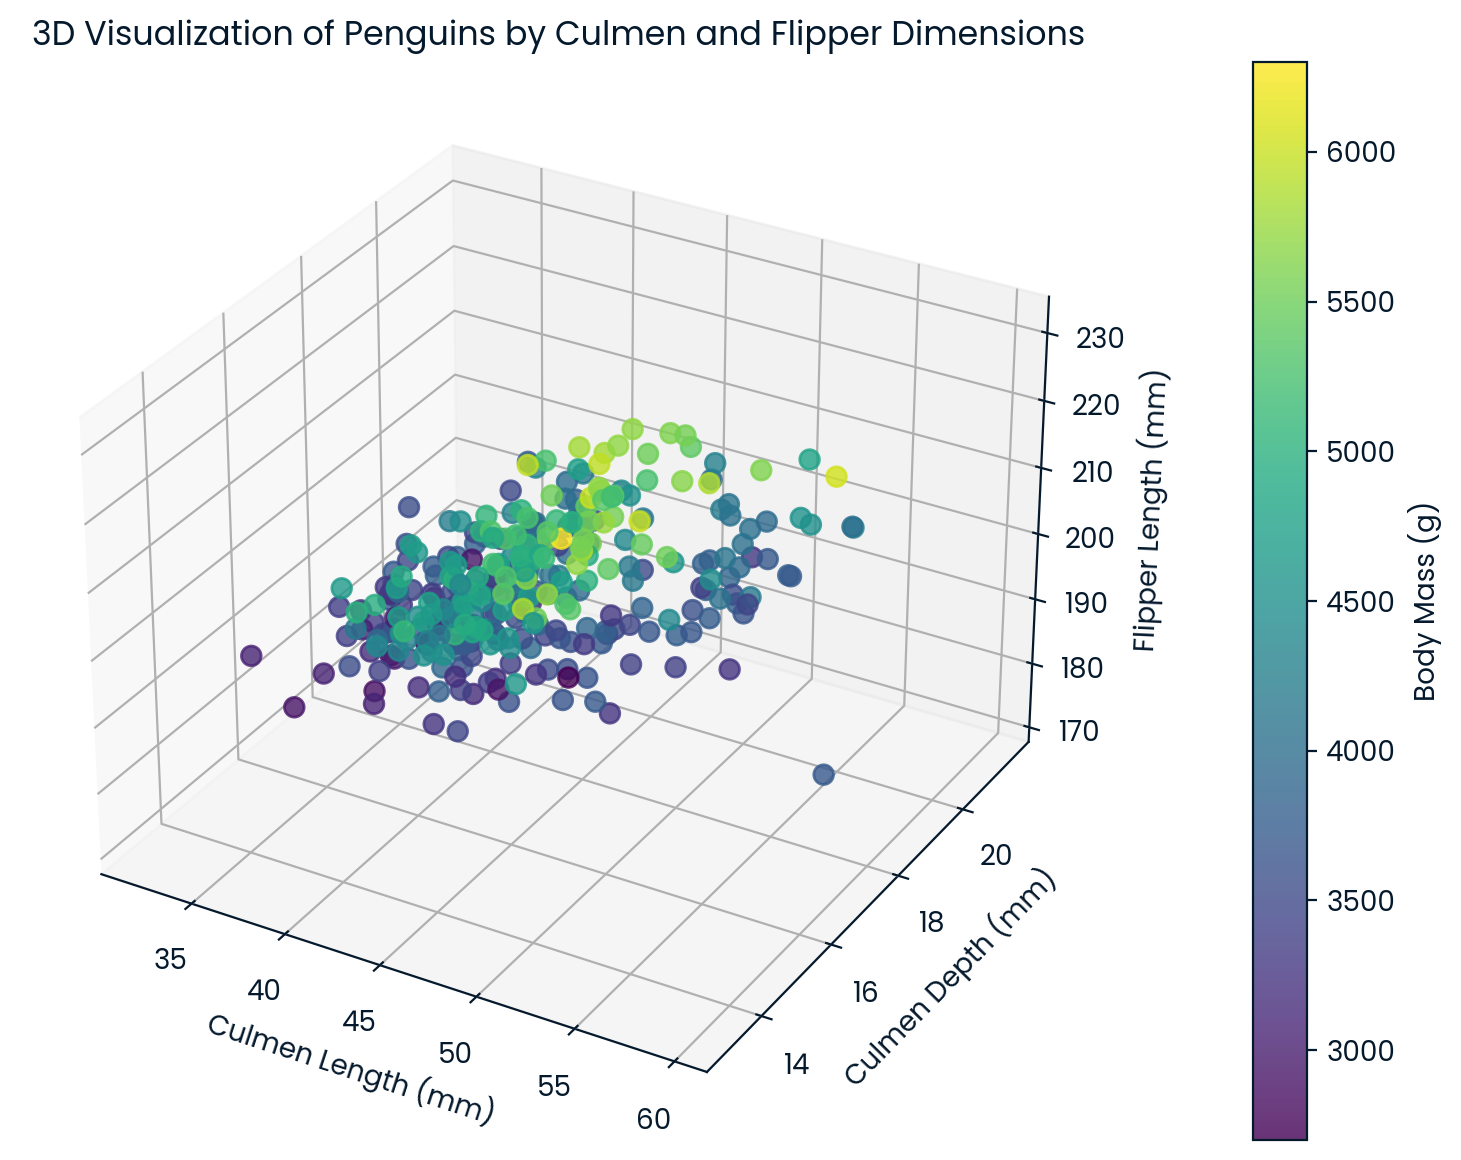

In [67]:
# Initialize the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], penguins_df['flipper_length_mm'],
                     c=penguins_df['body_mass_g'], cmap='viridis', s=50, alpha=0.8)

# Add labels to each axis
ax.set_xlabel('Culmen Length (mm)')
ax.set_ylabel('Culmen Depth (mm)')
ax.set_zlabel('Flipper Length (mm)')

# Add a color bar to show the mapping to body mass
color_bar = fig.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('Body Mass (g)')

# Optional: Add a title
ax.set_title('3D Visualization of Penguins by Culmen and Flipper Dimensions')

plt.show()

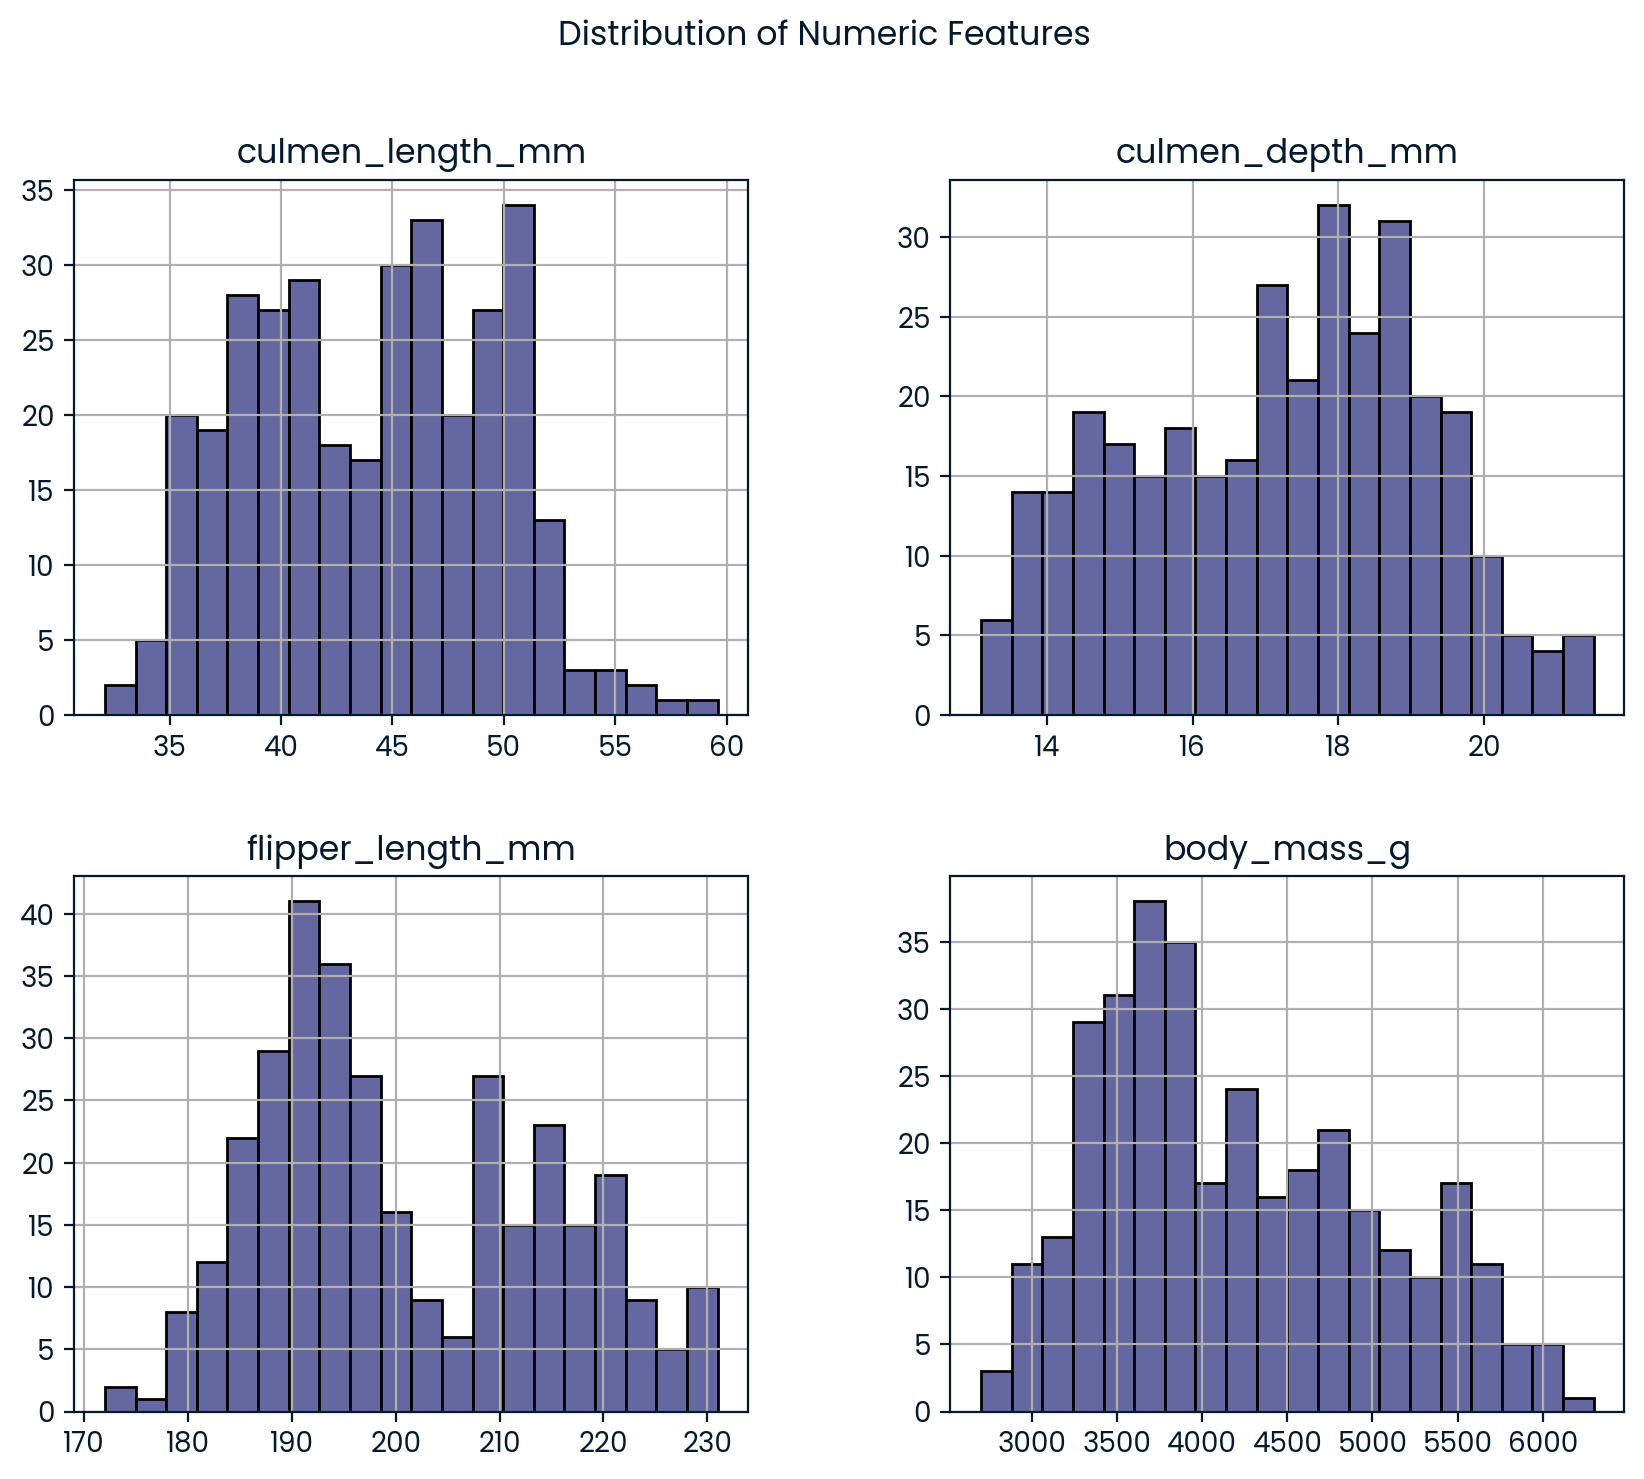

In [68]:


# Plot histograms for each numeric column
penguins_df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()


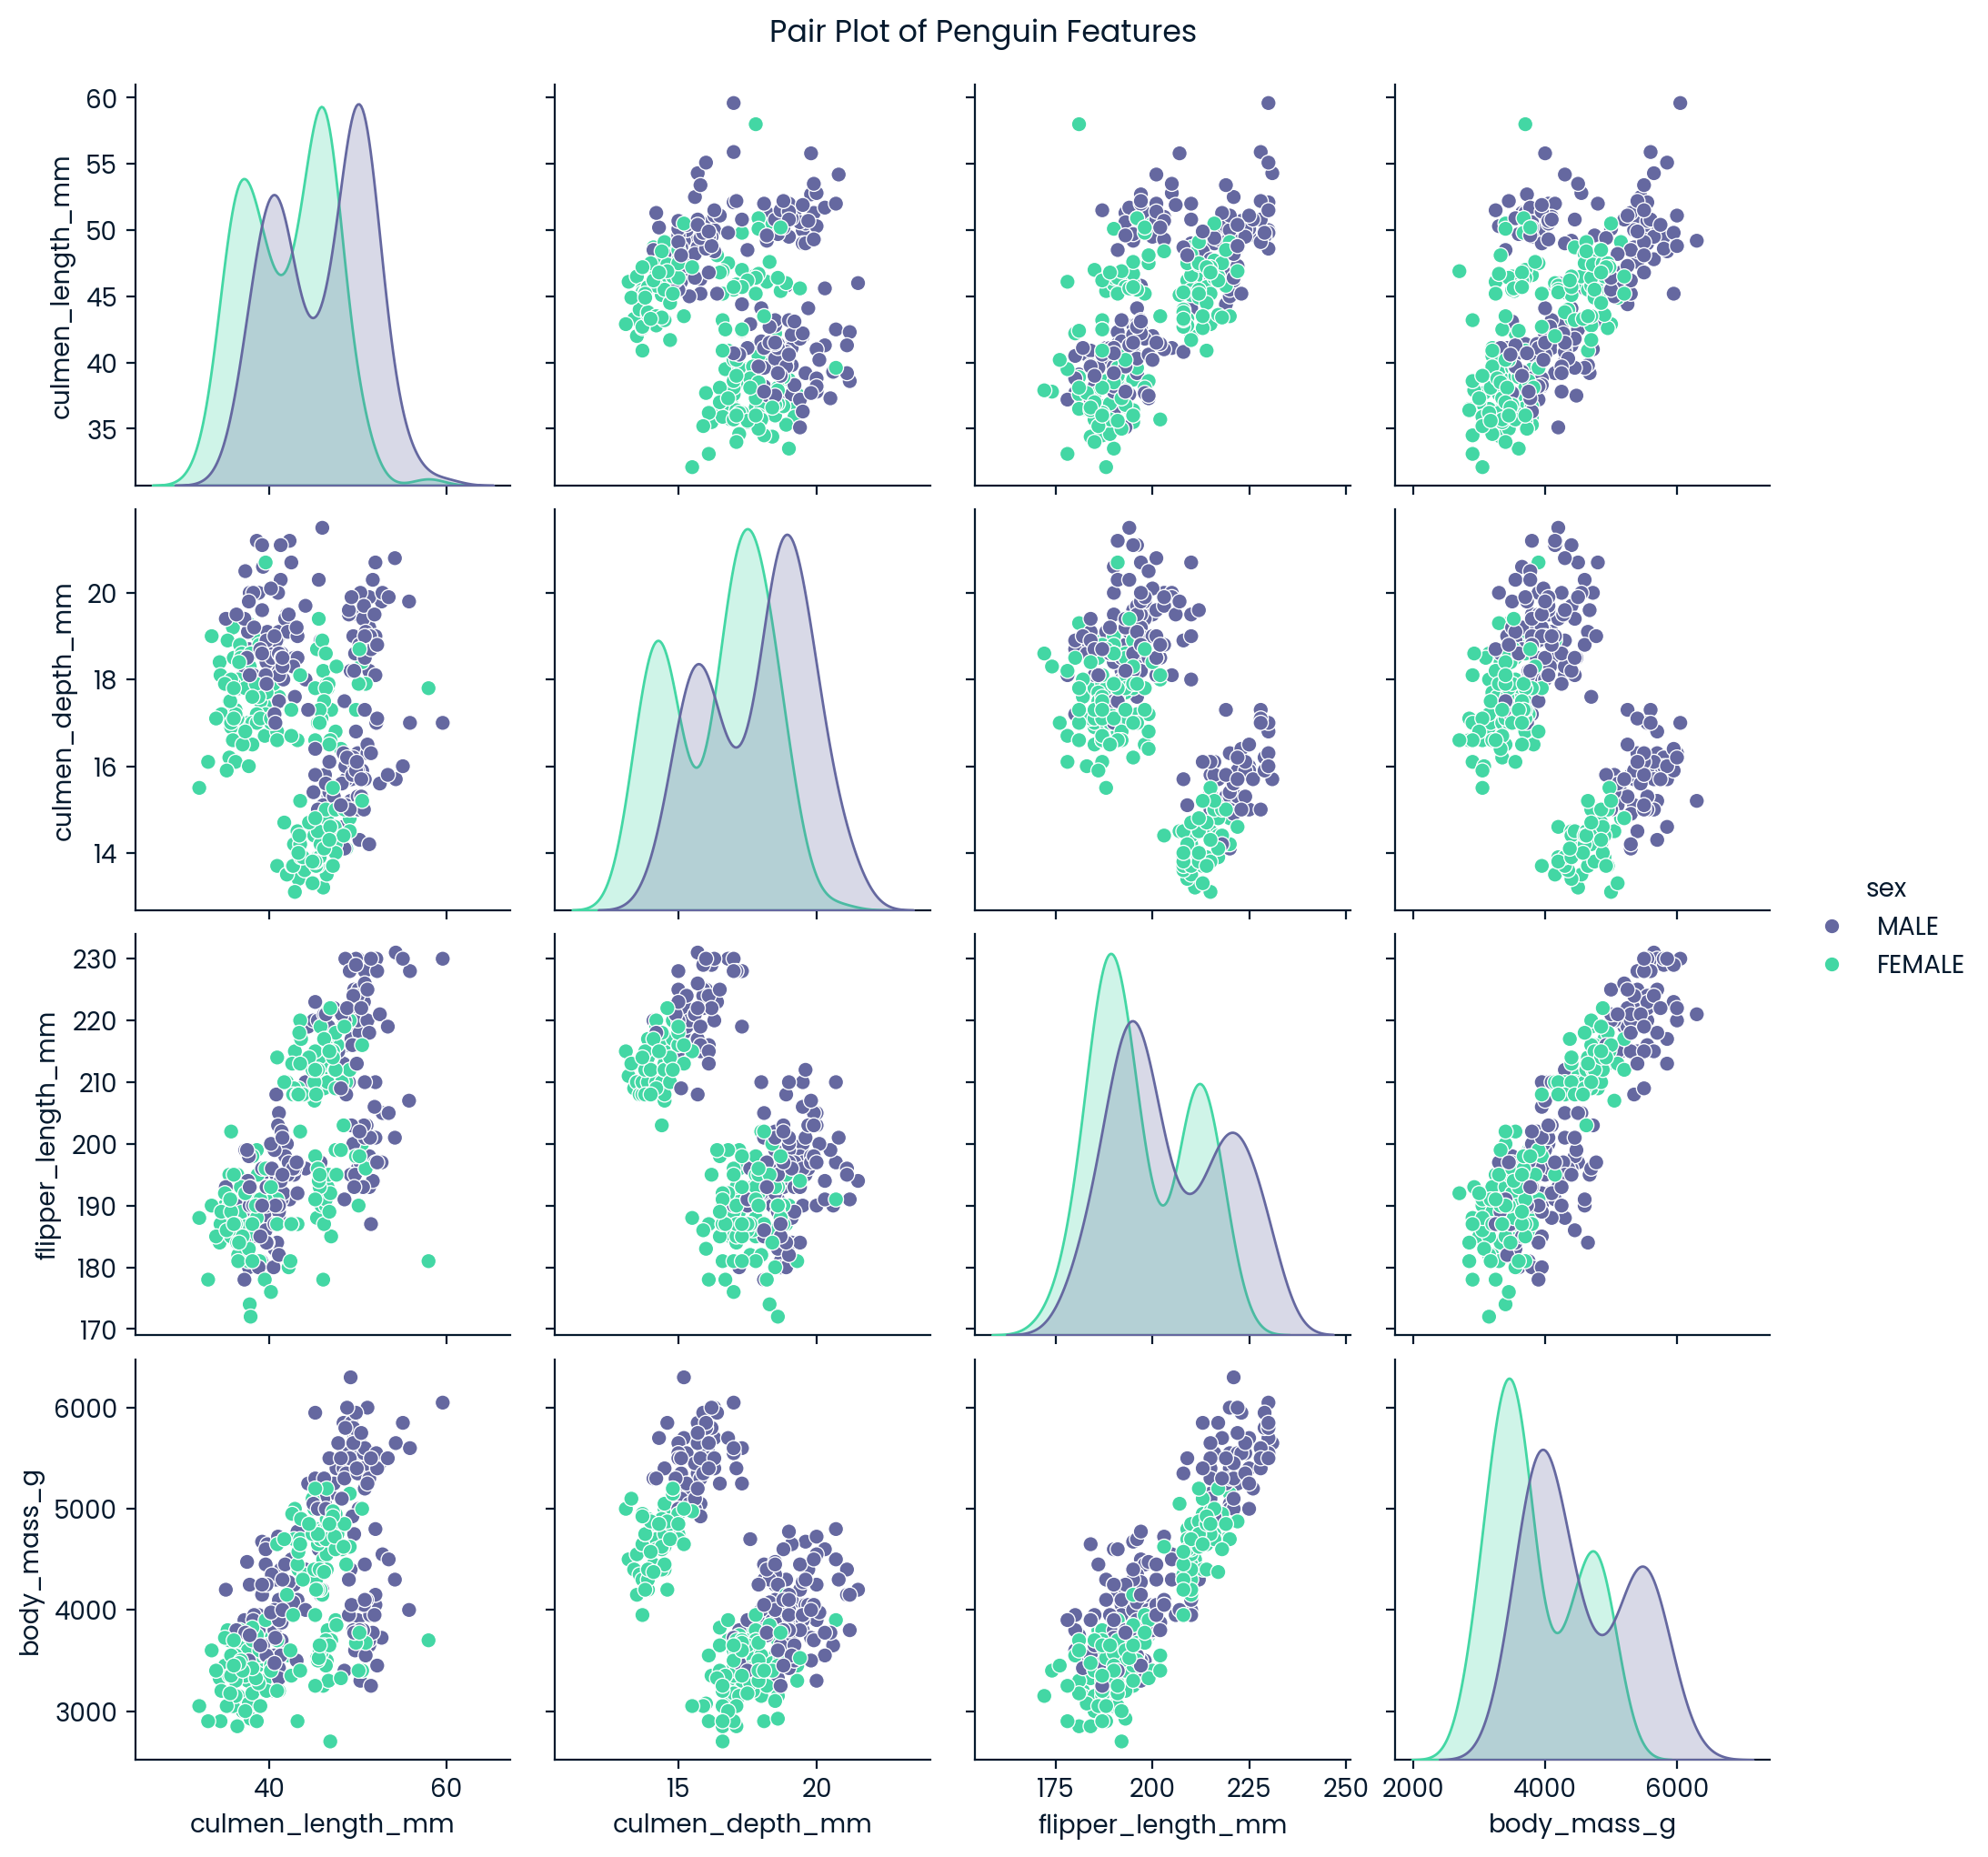

In [69]:
# Pair plot to visualize relationships between features
sns.pairplot(penguins_df, hue='sex')
plt.suptitle('Pair Plot of Penguin Features', y=1.02)
plt.show()


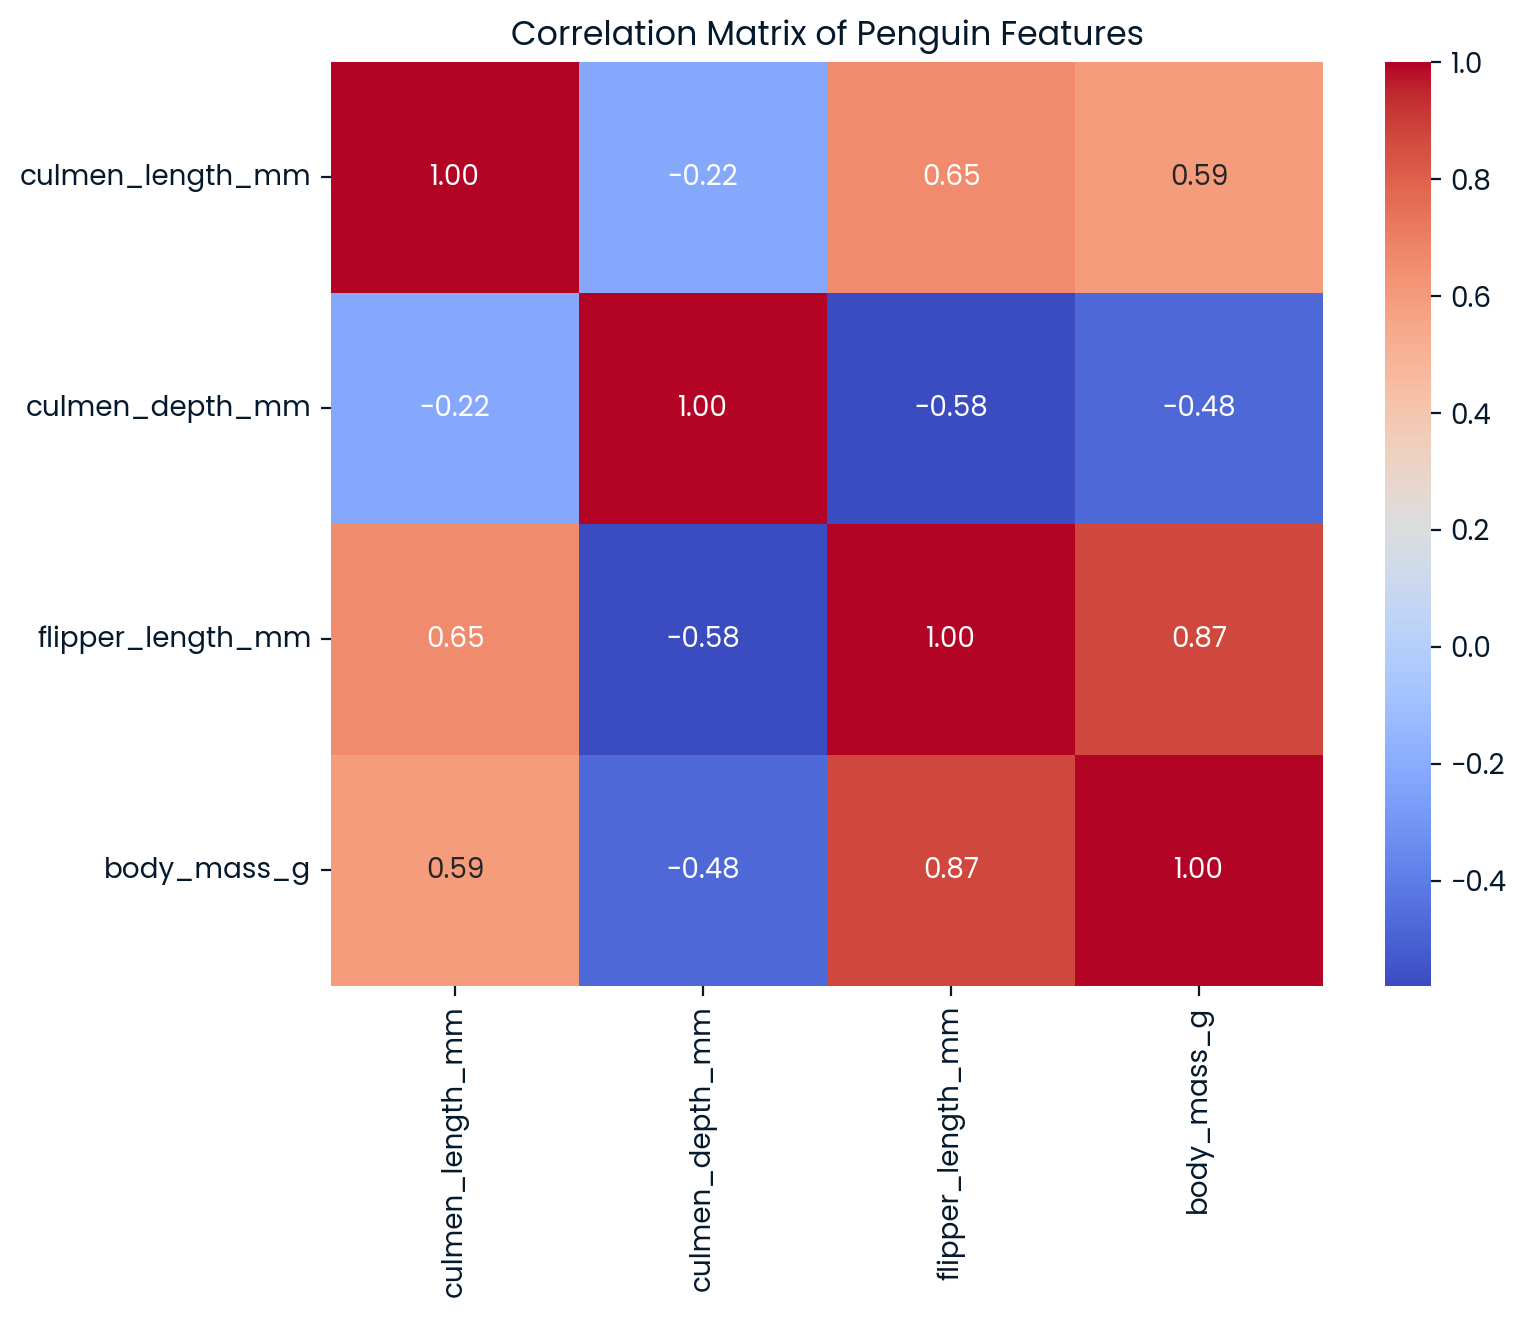

In [70]:
# Compute the correlation matrix
correlation_matrix = penguins_df.corr()

# Display the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Penguin Features')
plt.show()


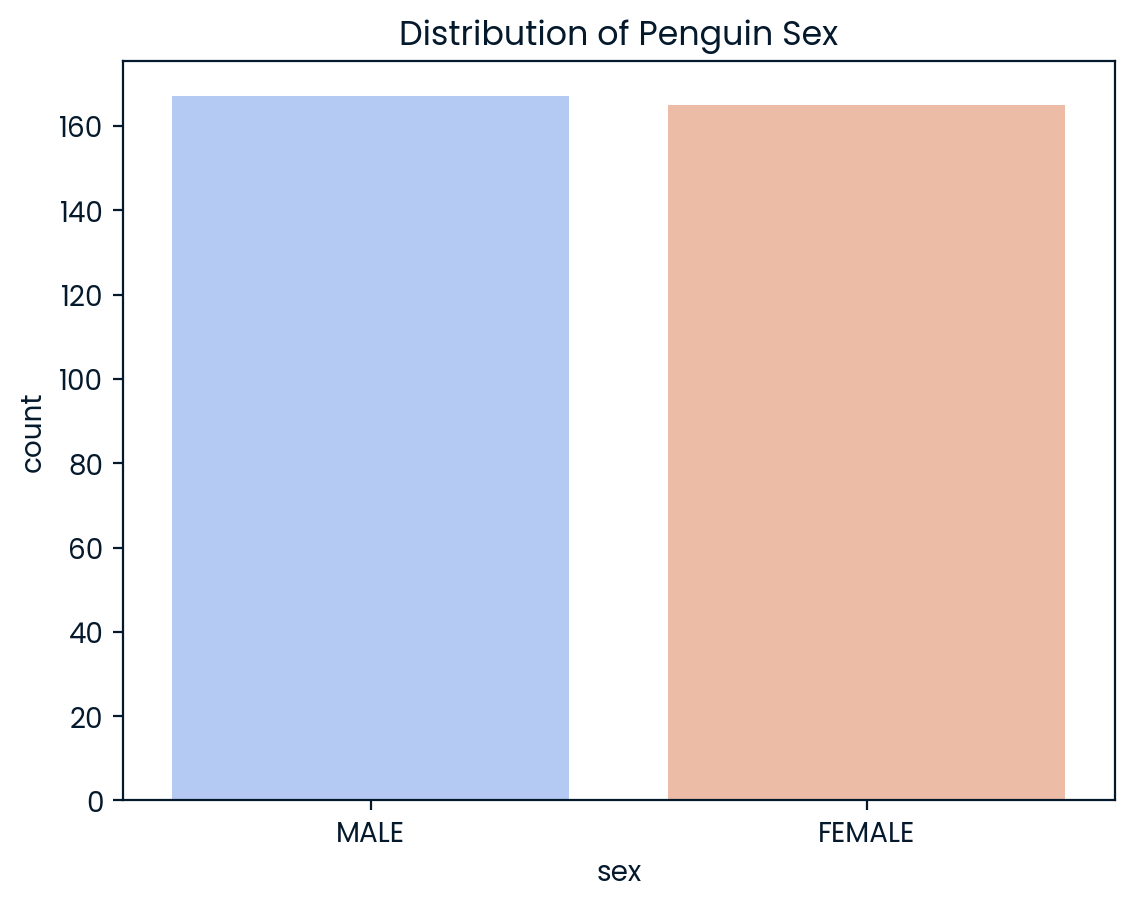

MALE      167
FEMALE    165
Name: sex, dtype: int64


In [71]:
# Count the number of male and female penguins
sex_counts = penguins_df['sex'].value_counts()

# Plot the distribution of sex
sns.countplot(x='sex', data=penguins_df, palette='coolwarm')
plt.title('Distribution of Penguin Sex')
plt.show()

print(sex_counts)


In [72]:
from sklearn.decomposition import PCA

features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

scaler = StandardScaler()
penguins_nonnumeric = penguins_df[features]
penguins_df_scaled = scaler.fit_transform(penguins_nonnumeric)

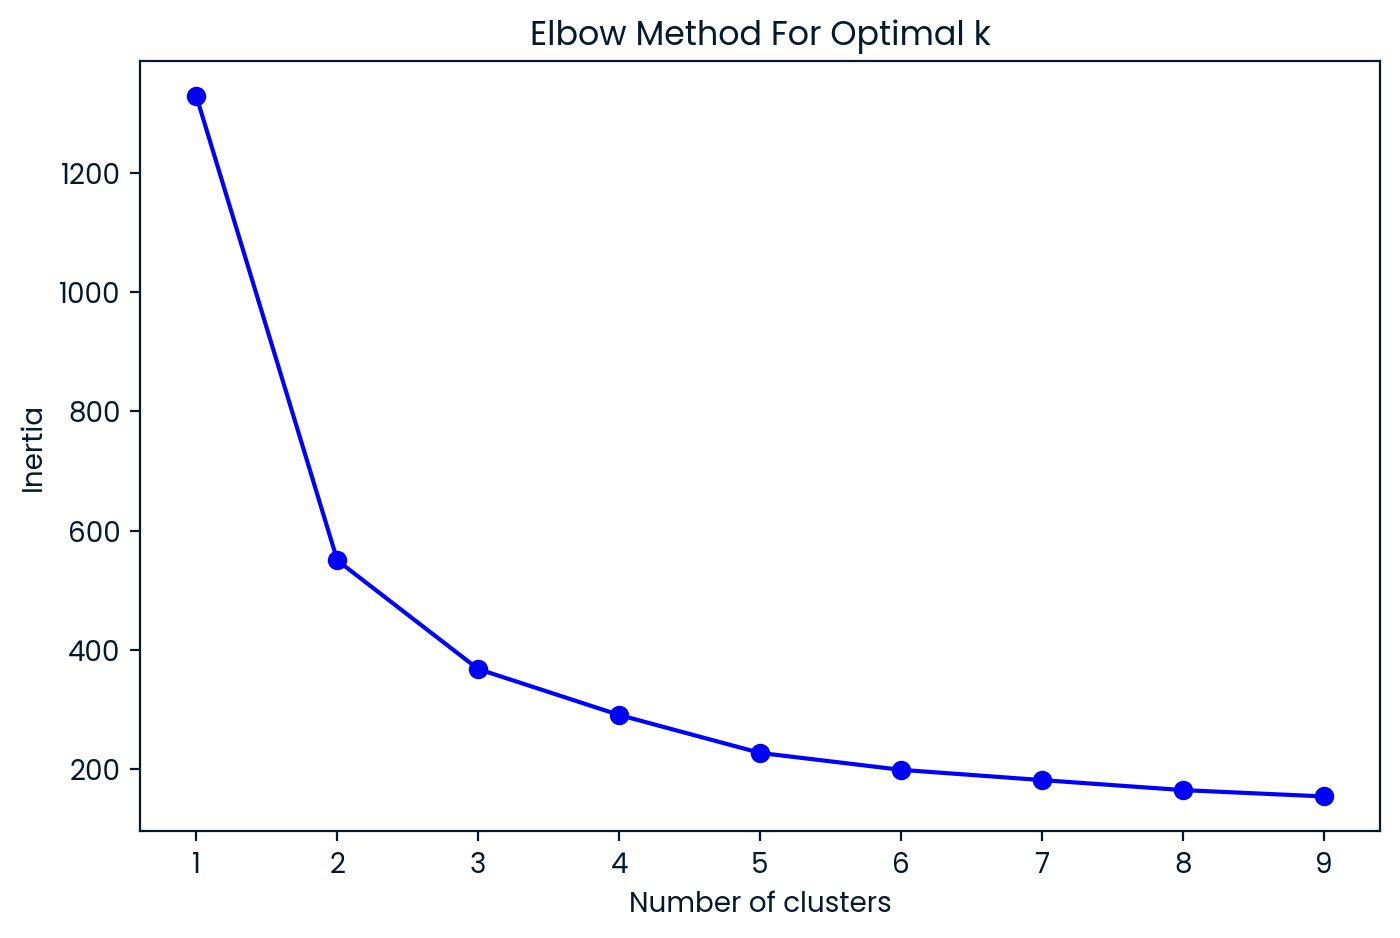

In [73]:
# Use elbow method to get the best number of clustering

inertia=[]
K = range(1,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(penguins_df_scaled)
    inertia.append(model.inertia_)
    
    
# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [74]:
# Apply KMeans on n_clusters = 3

# Apply K-Means clustering
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=81)
penguins_nonnumeric['Cluster'] = kmeans.fit_predict(penguins_df_scaled)

# Calculate the mean of the original numeric variables by cluster
stat_penguins = penguins_nonnumeric.groupby('Cluster').mean()
print(stat_penguins.head)

<bound method NDFrame.head of          culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
Cluster                                                                   
0               47.735714        18.751190         196.869048  3897.023810
1               49.792982        15.738596         221.912281  5519.736842
2               38.330233        18.101550         188.651163  3590.697674
3               45.522581        14.314516         212.935484  4699.596774>


In [75]:
# Dimensionality Reduction using PCA

# decide on PCA.n_components
pca = PCA().fit(penguins_df_scaled)
cumulative_variance = pca.explained_variance_ratio_.cumsum()


print(cumulative_variance)

[0.68713344 0.88354908 0.9730663  1.        ]


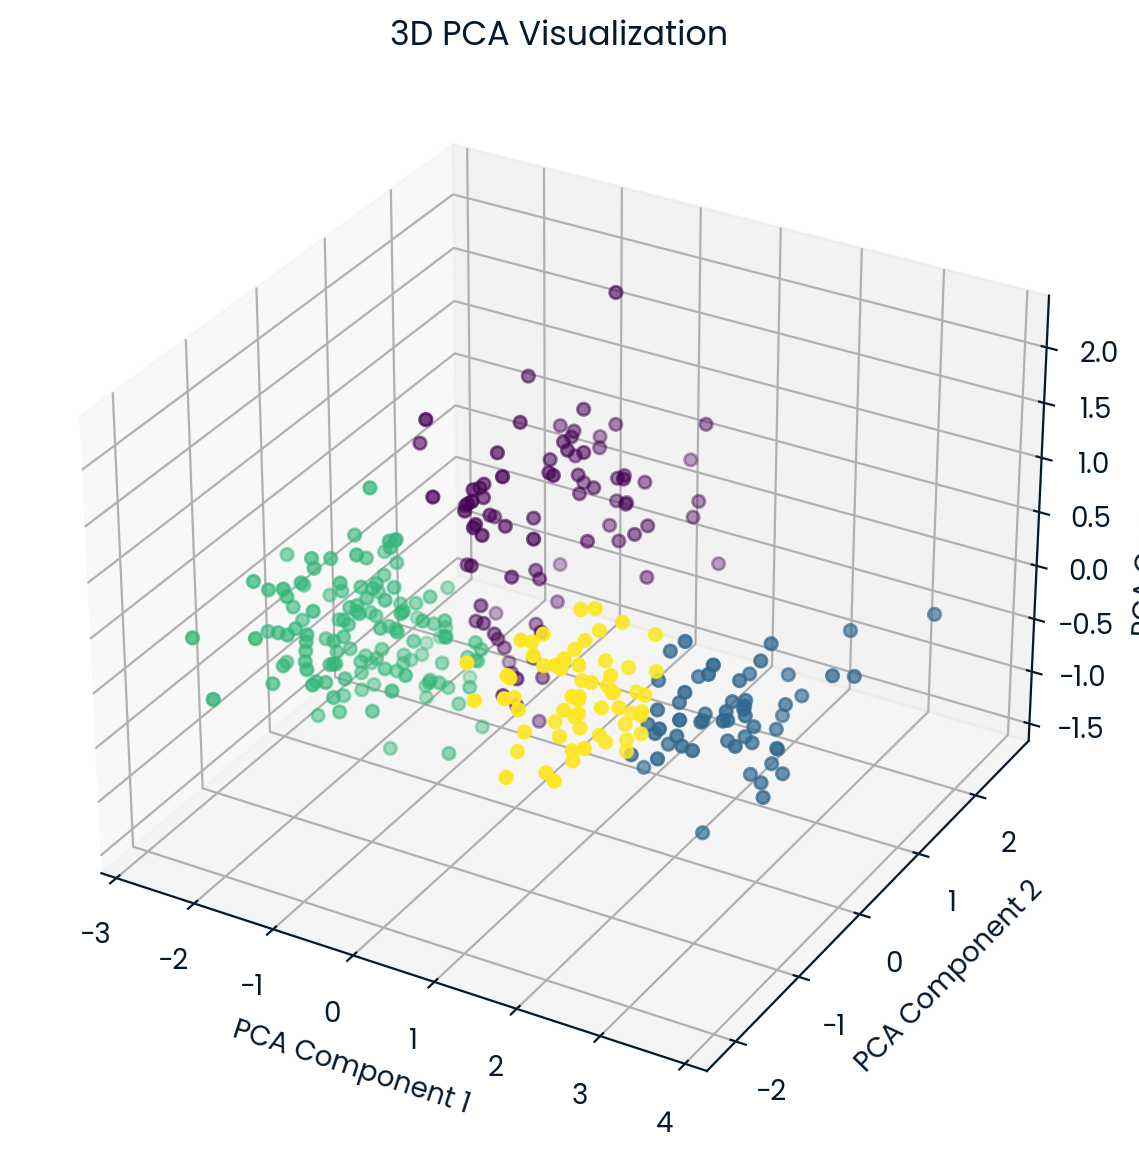

In [76]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming penguins_df_scaled and penguins_nonnumeric are already defined
pca_3d = PCA(n_components=3)
penguins_pca_3d = pca_3d.fit_transform(penguins_df_scaled)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Check if 'Cluster' column exists in penguins_nonnumeric
if 'Cluster' in penguins_nonnumeric.columns:
    ax.scatter(penguins_pca_3d[:, 0], penguins_pca_3d[:, 1], penguins_pca_3d[:, 2], c=penguins_nonnumeric['Cluster'], cmap='viridis')
else:
    print("Error: 'Cluster' column not found in penguins_nonnumeric DataFrame")

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Visualization')
plt.show()

In [77]:
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
Cluster,,,,
0,47.735714,18.751190,196.869048,3897.023810
1,49.792982,15.738596,221.912281,5519.736842
2,38.330233,18.101550,188.651163,3590.697674
3,45.522581,14.314516,212.935484,4699.596774
